In [1]:
###importing necessary packages and libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
%matplotlib inline

In [2]:
## reading the dataset into a pandas dataframe

fraud_df = pd.read_csv('fraud.csv')

In [3]:
fraud_df.head()

,feat_0,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,feat_10,feat_11,feat_12,Class
0,-3.001413,0.842502,-0.004393,-0.495649,-0.767347,-1.151800,-1.124656,0.550557,-2.001858,-3.635200,2.092099,-0.839797,-0.511105,0
1,-1.375069,3.935754,-1.947823,-0.773651,-0.074057,2.638233,-0.092174,-0.258814,-2.632742,2.126442,-0.120198,1.953657,0.281696,0
2,-0.578300,0.347300,-0.205725,-0.031916,-0.586520,0.177731,-0.855233,1.129882,-0.707296,1.231800,-1.228655,-0.822820,-0.157568,0
3,-1.989696,0.016358,0.081291,0.279238,0.237348,-0.764086,0.078435,-0.738415,-1.542902,-0.955018,-0.528081,0.668732,-0.699783,0
4,0.253593,1.275498,-0.693154,-0.145003,1.246269,1.197096,2.101381,-0.780943,-0.381511,1.086960,-0.756325,0.335350,1.421022,0


In [5]:
fraud_df.shape

(5000, 14)

In [ ]:
##General information
fraud_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   feat_0   5000 non-null   float64
 1   feat_1   5000 non-null   float64
 2   feat_2   5000 non-null   float64
 3   feat_3   5000 non-null   float64
 4   feat_4   5000 non-null   float64
 5   feat_5   5000 non-null   float64
 6   feat_6   5000 non-null   float64
 7   feat_7   5000 non-null   float64
 8   feat_8   5000 non-null   float64
 9   feat_9   5000 non-null   float64
 10  feat_10  5000 non-null   float64
 11  feat_11  5000 non-null   float64
 12  feat_12  5000 non-null   float64
 13  Class    5000 non-null   int64  
dtypes: float64(13), int64(1)
memory usage: 547.0 KB


In [7]:
### Class imbalance ratio
fraud_df['Class'].value_counts(True)

Class
0    0.9462
1    0.0538
Name: proportion, dtype: float64

### The class imbalance is high here, ~95% belong to class 0 while ~5% belong to class 1

/var/folders/bp/_p8p3d4j4qq20ccmqb6cjs2w0000gn/T/ipykernel_87449/3870845761.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Class', data=fraud_df, palette='Set1')


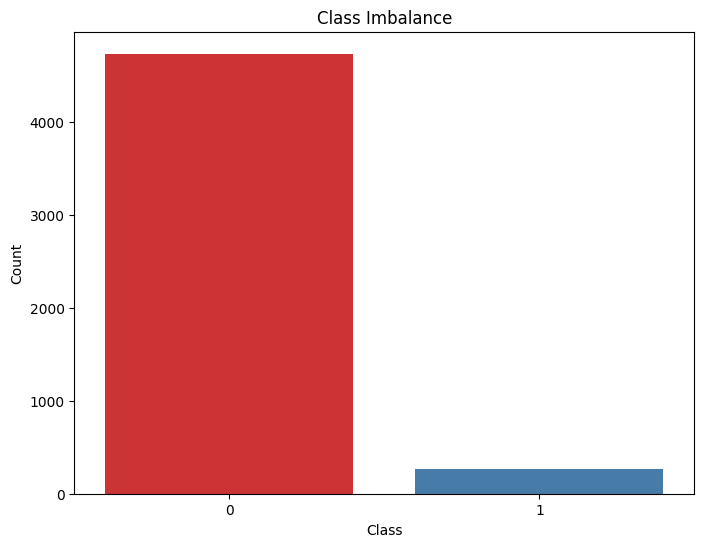

In [9]:
##Visualizing the class imbalance
plt.figure(figsize=(8, 6))
sns.countplot(x='Class', data=fraud_df, palette='Set1')
plt.title('Class Imbalance')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

In [10]:
##Visualizing the dataset in a 2D space using pCA as well as t-SNE
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

def plot_pca_tsne(X, y):
    # PCA
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X)

    # t-SNE
    tsne = TSNE(n_components=2, random_state=42)
    X_tsne = tsne.fit_transform(X)

    # Plotting
    fig, ax = plt.subplots(1, 2, figsize=(12, 6))

    # PCA plot
    ax[0].scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', s=5)
    ax[0].set_title('PCA')
    ax[0].set_xlabel('Principal Component 1')
    ax[0].set_ylabel('Principal Component 2')

    # t-SNE plot
    ax[1].scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap='viridis', s=5)
    ax[1].set_title('t-SNE')
    ax[1].set_xlabel('t-SNE Component 1')
    ax[1].set_ylabel('t-SNE Component 2')

    plt.show()

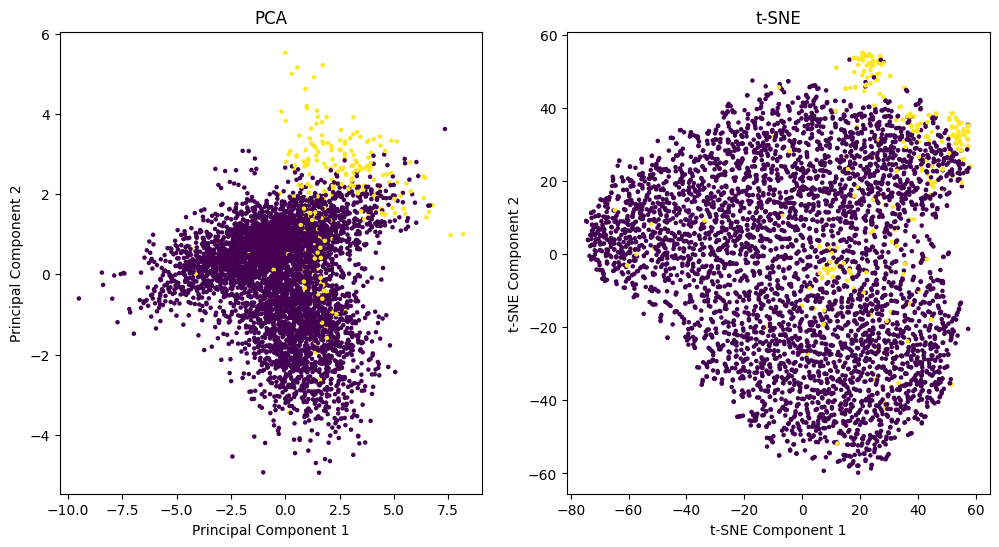

In [11]:
plot_pca_tsne(fraud_df.drop('Class', axis=1), fraud_df['Class'])

### From the above plots in 2D, we see that it is difficult to interprete the formation of clusters. With respect to the principal components of both the approaches, there appears to be presence of overlaps, which makes this unfit for distance based clustering techniques.

              precision    recall  f1-score   support

           0       0.97      1.00      0.99       937
           1       0.97      0.60      0.75        63

    accuracy                           0.97      1000
   macro avg       0.97      0.80      0.87      1000
weighted avg       0.97      0.97      0.97      1000



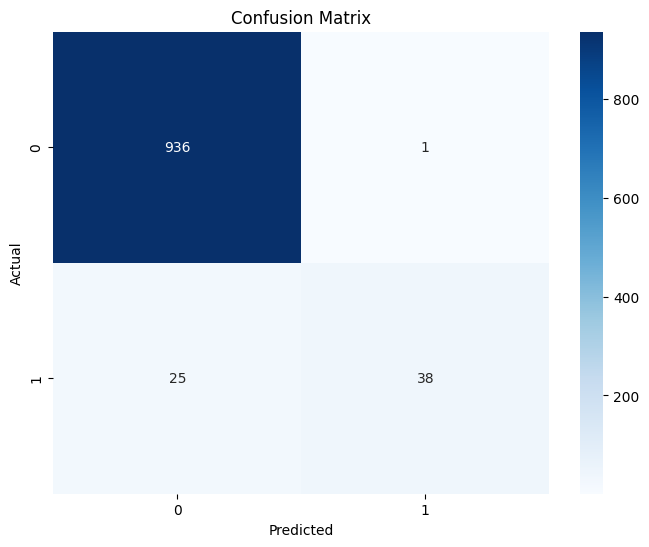

In [12]:
#Training a basic RF model
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Splitting the data into training and testing sets
X = fraud_df.drop('Class', axis=1)
y = fraud_df['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Training a Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
# Making predictions
y_pred = rf.predict(X_test)
# Evaluating the model
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### We observe that the recall is low for class 1, although the total accuracy is high. Total accuracy is high as the data is heavily imbalanced, with most of the labels being 0. To improve recall, we need to make the dataset balanced.

/Users/kaushikchakraborty/Desktop/github/ePGD-IITB/epgd/lib/python3.9/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.98      0.98      0.98       937
           1       0.71      0.71      0.71        63

    accuracy                           0.96      1000
   macro avg       0.85      0.85      0.85      1000
weighted avg       0.96      0.96      0.96      1000



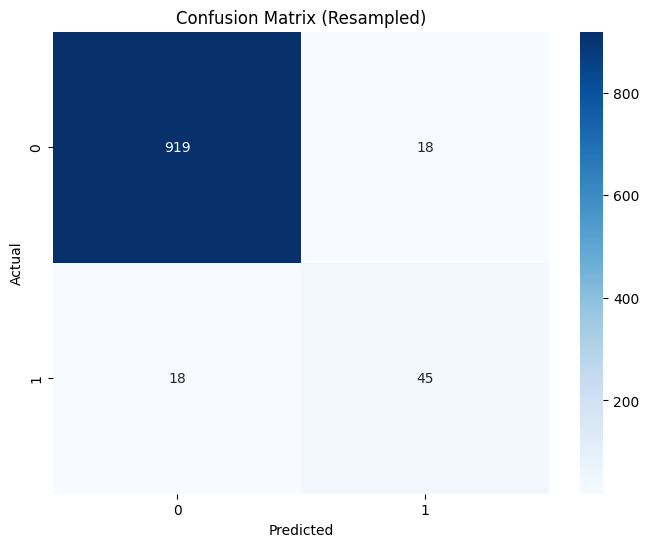

In [ ]:
##Using smote to balance the dataset

from imblearn.over_sampling import SMOTE

# Applying SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)
# Training a Random Forest Classifier on the resampled data
rf_resampled = RandomForestClassifier(n_estimators=100, random_state=42)
rf_resampled.fit(X_resampled, y_resampled)
# Making predictions on the test set
y_pred_resampled = rf_resampled.predict(X_test)
# Evaluating the model
print(classification_report(y_test, y_pred_resampled))
cm_resampled = confusion_matrix(y_test, y_pred_resampled)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_resampled, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix (Resampled)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### The class balancing helped improve the recall.